In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from config import *
from models import Generator, Discriminator, GRelu, JRelu
from torch_datasets import (small_ds, small_dl, sketch_ds, sketch_dl,
                            photo_ds, photo_dl, celeb_ds, celeb_dl)
from training import train
from utils import (show_batch, show_img, show_samples, plot_losses, 
                   render_samples, sorted_paths)

## Experiment: Increase D leak to .05

In [12]:
g = Generator().to(device)
d = Discriminator(act=GRelu(leak=.05)).to(device)

output = train(300, photo_dl, sample_freq=10, sample_dir='photo_samples2', 
               d=d, g=g)

Epoch [1/300] 
Batch 202 Metrics:
D loss (real): 0.4821	D loss (fake): 0.0001
G loss: 11.9797

Epoch [16/300] 
Batch 202 Metrics:
D loss (real): 0.0247	D loss (fake): 0.3350
G loss: 7.1250

Epoch [31/300] 
Batch 202 Metrics:
D loss (real): 0.0142	D loss (fake): 2.3343
G loss: 8.5377

Epoch [46/300] 
Batch 202 Metrics:
D loss (real): 0.1855	D loss (fake): 0.2570
G loss: 3.8149

Epoch [61/300] 
Batch 202 Metrics:
D loss (real): 0.3091	D loss (fake): 0.0319
G loss: 3.1188

Epoch [76/300] 
Batch 202 Metrics:
D loss (real): 0.0357	D loss (fake): 0.0787
G loss: 4.5330

Epoch [91/300] 
Batch 202 Metrics:
D loss (real): 0.0253	D loss (fake): 0.0072
G loss: 6.6409

Epoch [106/300] 
Batch 202 Metrics:
D loss (real): 0.0015	D loss (fake): 0.5767
G loss: 7.9326

Epoch [121/300] 
Batch 202 Metrics:
D loss (real): 0.0071	D loss (fake): 0.0712
G loss: 7.0096

Epoch [136/300] 
Batch 202 Metrics:
D loss (real): 0.0024	D loss (fake): 0.0101
G loss: 7.4320

Epoch [151/300] 
Batch 202 Metrics:
D loss (rea

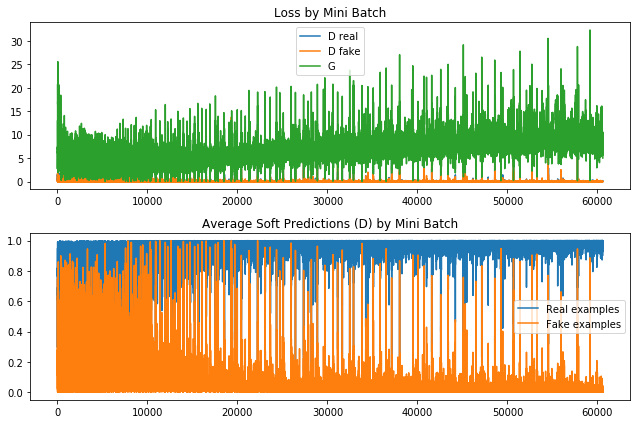

In [13]:
plot_losses(output)

MovieWriter imagemagick unavailable.


Writing file to photos.gif


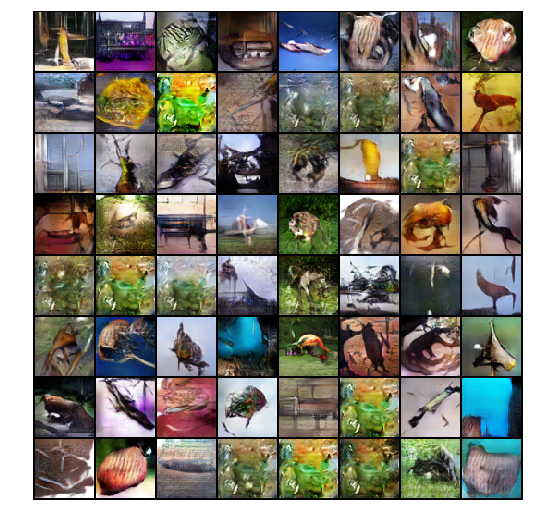

In [29]:
render_samples('photo_samples2', 'photos.gif')

## Experiment: ReLU variant
Found by Jeremy Howard to better preserve mean and variance throughout the model.

In [4]:
g = Generator(act=JRelu).to(device)
d = Discriminator(act=JRelu).to(device)

output = train(200, photo_dl, sample_freq=10, sample_dir='photo_samples3', 
               d=d, g=g)

MovieWriter imagemagick unavailable.


Writing file to photos3.gif


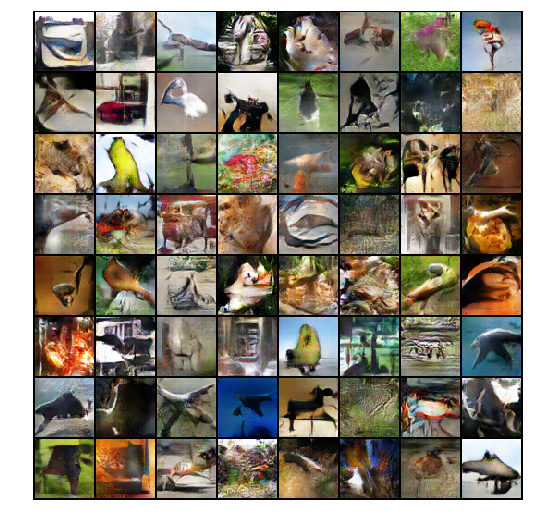

In [30]:
render_samples('photo_samples3', 'photos3.gif')

## Check small_dl working

In [8]:
g = Generator(act=GRelu(.02)).to(device)
d = Discriminator().to(device)

output = train(1_000, small_dl, sample_freq=50, sample_dir='small_samples2', 
               d=d, g=g)

Epoch [1/1000] 
Batch 7 Metrics:
D loss (real): 0.4828	D loss (fake): 0.2193
G loss: 5.5517

Epoch [51/1000] 
Batch 7 Metrics:
D loss (real): 0.0175	D loss (fake): 0.0433
G loss: 7.2200

Epoch [101/1000] 
Batch 7 Metrics:
D loss (real): 0.1305	D loss (fake): 0.0863
G loss: 4.4398

Epoch [151/1000] 
Batch 7 Metrics:
D loss (real): 0.0133	D loss (fake): 0.0163
G loss: 5.0199

Epoch [201/1000] 
Batch 7 Metrics:
D loss (real): 0.0078	D loss (fake): 0.0182
G loss: 6.4526

Epoch [251/1000] 
Batch 7 Metrics:
D loss (real): 0.0034	D loss (fake): 0.0469
G loss: 9.9102

Epoch [301/1000] 
Batch 7 Metrics:
D loss (real): 0.0059	D loss (fake): 0.0106
G loss: 7.7246

Epoch [351/1000] 
Batch 7 Metrics:
D loss (real): 0.0001	D loss (fake): 0.0000
G loss: 46.2722

Epoch [401/1000] 
Batch 7 Metrics:
D loss (real): 0.0594	D loss (fake): 0.0696
G loss: 6.7770

Epoch [451/1000] 
Batch 7 Metrics:
D loss (real): 0.1859	D loss (fake): 0.0844
G loss: 5.3658

Epoch [501/1000] 
Batch 7 Metrics:
D loss (real): 0.

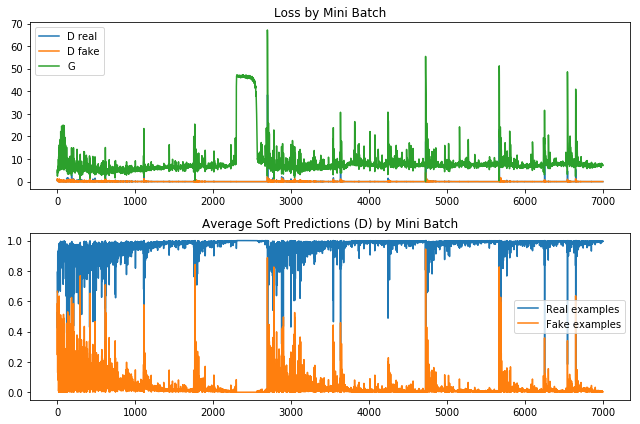

In [14]:
plot_losses(output)

MovieWriter imagemagick unavailable.


Writing file to small_samples.gif


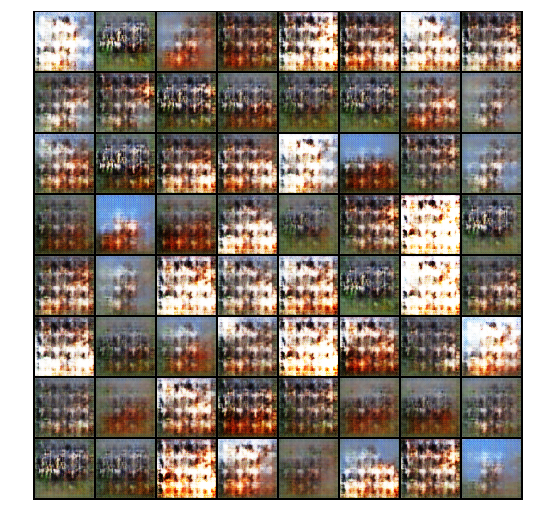

In [28]:
render_samples('small_samples2', 'small_samples.gif')

## Celeb Dataset

In [34]:
epochs = 20
g = Generator(act=GRelu(.02)).to(device)
d = Discriminator().to(device)

output = train(epochs, celeb_dl, sample_freq=1, sample_dir='celeb_samples', 
               d=d, g=g)

Epoch [1/20] 
Batch 3166 Metrics:
D loss (real): 0.0000	D loss (fake): 0.0000
G loss: 52.0724

Epoch [2/20] 
Batch 3166 Metrics:
D loss (real): 0.0000	D loss (fake): 0.0000
G loss: 51.9042

Epoch [3/20] 
Batch 3166 Metrics:
D loss (real): 0.0000	D loss (fake): 0.0000
G loss: 51.6903

Epoch [4/20] 
Batch 3166 Metrics:
D loss (real): 0.0000	D loss (fake): 0.0000
G loss: 51.4559

Epoch [5/20] 
Batch 3166 Metrics:
D loss (real): 0.0000	D loss (fake): 0.0000
G loss: 51.2800

Epoch [6/20] 
Batch 3166 Metrics:
D loss (real): 0.0000	D loss (fake): 0.0000
G loss: 51.0890

Epoch [7/20] 
Batch 3166 Metrics:
D loss (real): 0.0000	D loss (fake): 0.0000
G loss: 50.8647

Epoch [8/20] 
Batch 3166 Metrics:
D loss (real): 0.0000	D loss (fake): 0.0000
G loss: 50.4187



KeyboardInterrupt: 